# Neural Networks

## Overview
In this lesson we will see how machine learning techniques can be successfully applied to solve financial problems. We will first do a quick tour on the theory behind neural networks and then we will see an example and two practical applications regarding regression and classification issues. 

**Disclaimer**: this lecture just scratches the surface of the machine learning topic which has seen a huge development in the latest years leading to thousands of applications in many different fields.

## Neural network Definition
Artificial Neural Networks (ANN or simply NN) are information processing models that are developed by inspiring from the working principles of human brain. Their most essential property is the ability of learning from sample sets. 

The basic unit of ANN architecture are neurons which are internally in connection with other neurons. 

![Model of an artificial neuron.](neuron.jpeg)

A neuron consists of weights ($w_i$) and real numbers ($x_i$). All inputs injected into a neuron are individually weighted, added together and passed into the activation function which produce the neuron output. There are many different types of activation function but one of the simplest is the *step function* which returns just 0 or 1 according to the input value (another is the *sigmoid* which can be thought of as the continuous version of the step function). 

![Step function.](step_function.png)
![Sigmoid function.](sigmoid.png)


## Training of a neuron

When teaching children how to recognize a bus, we just tell them, showing an example: “This is a bus. That is not a bus.” until they learn the concept of what a bus is. 
Furthermore, if the child sees new objects that she hasn’t seen before, we could expect her to recognize correctly whether the new object is a bus or not.

This is exactly the idea behind neurons.
Similarly, inputs from a *training* set are presented to the neuron one after the other together with the correct output and the neuron weights are modified accordingly.

When an entire pass through all of the input training vectors is completed the neuron has learnt ! 

At this time, if an input vector $\vec{P}$ (already in the training set) is given to the neuron, it will output the correct value. If $\vec{P}$ is not in the training set, the network will respond with an output similar to other training vectors close to $\vec{P}$.

Unfortunately using just a neuron is not too useful since it is not possible to solve
the interesting problems we would like to face with just that simple architecture. The next step is then to put together more neurons in *layers*.

### Multi-layered neural networks

![A multi-layered neural network.](multilayer.jpeg)

Each input from the *input layer* is fed up to each node in the next hidden layer, and from there to each node on the output layer. We should note that there can be any number of nodes per layer and there are usually multiple hidden layers to pass through before ultimately reaching the output layer.







But to train this network we need a learning algorithm which should be able to tune not only the weights between the output layer and the hidden layer but also the weights between the hidden layer and the input layer. 

### Back propagation

In order to tune the weights at each layer at every iteration we should know what the output would be at each node. But this is not possbile since the only value we know is the correct output at the last node (the final output of the NN which can be compared to our truth of the training output).
The method that was suggested to overcome the issue was to take the errors at the output layer (last node) and proportionally propagate it backwards to all the hidden layer.

So, what it's going to happen is:

* present a training sample to the neural network (initialized with random weights);
* compute the output received by calculating activations of each layer and thus calculate the error as the difference between the NN output and the training sample expected result;
* having calculated the error, readjust the weights such that the error (difference) decreases;
* continue the process for all training samples several times until the weights are not changing too much (a.k.a. the process converged).

The NN error is computed by the *loss function* (usually it is either the mean squared error or the mean absolute error) and an *optimization function* is then 
used to choose the appropriate weight values in order to reduce the loss function value (we will use *Adam* as optimizator in the following but there are more).








### Neural Network Design

There is no rule to guide developer into the design of a neural network in terms of number of layers and neuron per layer. The most common strategy is a trail and error one where you finally pick up the solution giving the best accuracy. In general a larger number of nodes is better to catch highly structured data with a lot of feature although it may require larger training sample to work correctly.

A common mistake to avoid is to *overtrain* a NN. Overtraining is what happens when the NN learns too well the training sample but its performance degrade substantially in an independent testing sample. 

So usually it is required to split the available sample in two parts training and testing (e.g. 80% and 20%) and to use the former to perform the training and the latter to cross-check the performance. **Usually performance are *measured* with the mean square error computed between the truth of the sample and the NN predictions.**

Anyway as a rule of thumb a NN with just one hidden layer with a number of neurons averaging the inputs and outputs is sufficient in most cases. In the following we will use more complex networks just for illustration, no strong attempt in optimizing the layout has been done though.

## Practical Examples

Below it will be illustrated few practical applications of neural network trainings in python. 
Various modules are available to develop neural network in ```python```, we will
use ```Keras``` a relatively high level library which in turn use ```TensorFlow``` a very famous machine learning tool developed by Google.

In the attempt of keeping things as simple as possible I have added another layer above ```Keras```, ```FinNN``` so that you can try 
to design some NN without caring too much about the many details and parameters that are involved in the process.

### Function approximation 

As a first practical example let's try to design an ANN which is capable of learning the functional form underlying a set of data.

Let's generate a sample with $x$ (input), $f(x)$ (truth) pairs where $f(x) = x^2$ and let's start to code the NN structure. 

We start by importing the necessary modules.
Then we generate the training sample (i.e. the $x$, $f(x)$ pairs) and apply a simple transformation on the sample in order to have all the inputs and outputs in the $[0, 1]$ range. This is usually done to provide the NN with *normalized* data, infact the NN can be fooled by large or very small numbers giving unstable results.

In [8]:
from finnn import FinNN
from numpy import arange, array

# define the dataset
x = array([i for i in arange(-50, 50, 0.01)])

y = array([i**3.0+2 for i in x])
print("Distribution of original data ", x.min(), x.max(), y.min(), y.max())

trainer = FinNN()
trainer.setData(x, y)

#trainer.normalize()

# here you should see that x and y are between 0 and 1
print("The same data after the normalization ", trainer.x.min(), 
      trainer.x.max(), trainer.y.min(), trainer.y.max())

Distribution of original data  -50.0 49.989999999980114 -124998.0 124927.01499885091
The same data after the normalization  -50.0 49.989999999980114 -124998.0 124927.01499885091


Next we can define the structure of the neural network. There is no predefined rule to decide the number of layers and nodes you need to go by trial and error. Here the problem is quite simple so there is no need to use a complecated NN. 

In the end I have decided to use two layers with 10 nodes each and a *sigmoidal* activation function. The input_dim parameter has to be set to 1 since we have just one single input, the $x$ value. 

In [10]:
# design the neural network model
trainer.addInputLayer(1, 15, 'sigmoid')
trainer.addHiddenLayer(15, 'sigmoid')
trainer.addOutputLayer(1)

# define the loss function (mean squared error) and optimization algorithm (Adam)
trainer.compileModel('mse', 'adam')

# fit the model on the training dataset
# using 500 epochs, a batch_size of 10
trainer.fit(500, 1000)

After the training is completed we can evaluate how good it is. To do this we can compute the residuals or the square root of the sum of the squared difference between the true value and the one predicted by the NN. We will also plot the true function and the predicted one in order to have a graphical representation of the goodness of our training.
To have a numerical estimate of the agreement it has been computed also the *mean squared error* defined as:

$MSE = \frac{\sum_{i=1}^n{\big(\frac{x_{i}^{pred} - x_i^{truth}}{x_i^{truth}}\big)^2}}{n}$

A *perfect* prediction would lead to $MSE=0$ so the lower this number the better the agreement. 

MSE: 2229777219.976


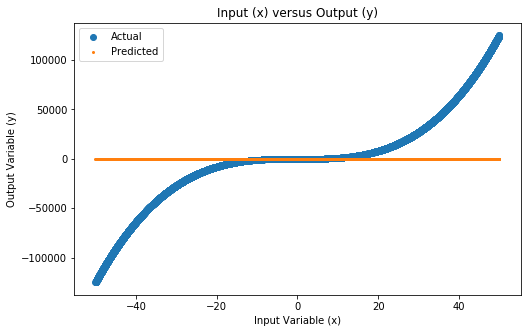

In [11]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

# make predictions for the input data
trainer.fullPrediction()

# invert the previous transformation to get back the real data and not the normalized one
#trainer.reverseNormalization()

# report model error computing the mean squared error
print('MSE: %.3f' % mean_squared_error(trainer.y, trainer.predictions))

# plot the true function and the prediction to see the actual difference
plt.figure(figsize=(8,5))
plt.scatter(trainer.x, trainer.y, label='Actual')
plt.scatter(trainer.x, trainer.predictions, label='Predicted', s=4)
plt.title('Input (x) versus Output (y)')
plt.xlabel('Input Variable (x)')
plt.ylabel('Output Variable (y)')
plt.legend()
plt.show()

The results are good, both visually and numerically; the predicted and actual functions match pretty well. 

### Exercise 8.1

In order to see how different parameter choices affect the training (both looking at a plot like the one before and the the $MSE$) try to:

* reduce the number of points used in the training (change the step from 0.1 to 1 or to 0.01 in $\tt{x = arange(-50, 51, 0.1))}$, expect worse results with less points;
* change the number of nodes per layer;
* change the activation function from 'sigmoid' to 'relu';
* change the number of epochs, this is the number of times the neural network will process the sample data to improve the training; setting verbose to 1 will show the progress with an estimate of the goodness of the training after each epoch; expect worse training with less epoch.


### Black-Scholes call options

The first financial application of a NN concerns the pricing of european call options: essentially we will create a neural network capable of approximate the famous Black-Scholes pricing formula.

First of all let's create the training sample. In order to do so we define a grid of rates, volatility and compute the price of a call using the pricing function in the ```finmarket.py``` library. For simplicity we assume $\mathrm{moneyness}=1$ and $T=1$.

In [4]:
import numpy as np
from finmarkets import call

# this list will keep the data for training
data = []
sigmas = np.arange(0.15, 0.55, 0.0005)
rates = np.arange(0, 0.1, 0.000125)

for r in rates:
    for sigma in sigmas:
        call_price = call(1, r, sigma, 1)
        data.append([r, sigma, call_price])
        
# we transform the list to a numpy array just because 
# an array it is more convenient to use later
data = np.asarray(data)

Since it takes some time to generate this data sample, it is advisable to save it in a file since we may need to load it many times during the NN development.
This can be done with the following code, where the sample is saved in a csv file (Comma Separated Values)

In [5]:
import csv

with open("bs_training_sample.csv", "w") as f:
    writer = csv.writer(f, delimiter=",", quotechar='"', quoting=csv.QUOTE_MINIMAL)
    for i in range(len(data)):
        writer.writerow(data[i])

Following the previous example we will use the ```FinNN``` utility class to develop the NN and also we will *normalize* data to get better results.
**Beware that this time we have TWO input parameters (rate and volatilty)** and not just one.

Furthermore we will also split the generated sample into a training and a testing part so that we could later check for overfitting by comparing the perfomance in the two cases.

In [6]:
# first load back data
import pandas as pd
from finnn import FinNN

data =  pd.read_csv("bs_training_sample.csv")

x = data.iloc[:, :2].values
# this notation means for each row in data ([:] 
# take the first two columns ([, :2])

y = data.iloc[:, 2].values
# this notation means for each row in data ([:] 
# take only the third column ([, 2])

# the last two parameters tell the class to split the original
# sample in training (2/3) and testing parts (1/3)
# and to not perform reshaping since data is already in the right form
# two columns each row
trainer = FinNN()
trainer.setData(x, y, 0.33)
trainer.normalize()

In [7]:
# define the NN architecture
trainer.addInputLayer(2, 20, 'sigmoid')
trainer.addHiddenLayer(8, 'sigmoid')
trainer.addOutputLayer(1)
        
# define loss and optimizer algorithms
trainer.compileModel('mse', 'adam')
    
# run the training
# this time we are using many more epochs 
# and a larger batch_size
trainer.fit(1000, 500)

# here we compare the performance 
# on the training and test sample
trainer.evaluate()

# when the training takes some time it is useful
# to save the model weights in a file to use it later on
trainer.saveModel()

428799/428799 [==============================] - 6s 15us/step
Training: 1.7409507249016224e-06
211200/211200 [==============================] - 3s 15us/step
Test: 1.740102028648063e-06


As you can see the training and test samples give roughly the same $MSE$ value so we are reasonably sure that there hasn't been *overfitting*.
After the training is completed again we can evaluate graphically how good it is.
<img src="vol_rate.png">
We can also compare the prediction in a practical case; let's say we want to know the price of a call (with moneyness 1 and time to maturity 1 year) when the interest rate is 0.015 and the volatility 0.234:

In [8]:
import numpy as np
from finmarkets import call

# here we load the trained model
trainer.loadModel('test')

# this is our input vector
rv = np.array([[0.015, 0.234]])
          
# here we compare the predection with the BS call price                 
print ('{} => {:.4f} (expected {:.4f})'.format(rv.tolist(), 
                                        trainer.predict(rv)[0][0], 
                                        call(1, rv[0][0], rv[0][1], 1)))

[[0.015, 0.234]] => 0.0998 (expected 0.1001)


But what happens when we ask the NN to predict call prices with rate and volatility outside the training *phase space* (with values that aren't in the intervals used in the training) ?
Let's try the same exercise as before but with different inputs, say $r = 0.22$ and $\sigma = 0.01$:

In [9]:
# this is our input vector
rv = np.array([[0.22, 0.01]])
                 
# here we compare the predection with the BS call price                 
print ('{} => {:.4f} (expected {:.4f})'.format(rv.tolist(), 
                                        trainer.predict(rv)[0][0], 
                                        call(1, rv[0][0], rv[0][1], 1)))

[[0.22, 0.01]] => 0.1557 (expected 0.1975)


In this case there is no agreement clearly showing that NN is not able to extrapolate the value of a function from input outside the training space.


## Neural net to recognize handwritten digits

We don't usually appreciate how tough a problem our visual system solve (consider that it involves 5 visual cortices containing 140 million neurons each), but the difficulties of visual pattern recognition become apparent if you attempt to write a computer program to recognize digits like those below. 

Simple intuition about how we recognize shapes - "a 9 has a loop at the top, and a vertical stroke in the bottom right" - turn out to be not so simple to express algorithmically. When you try to make such rules precise, you quickly get lost in a morass of exceptions and caveats and special cases so that it seems hopeless.

Neural networks approach the problem in a different way. The idea is to take a large number of handwritten digits and then develop a system which can learn from those training examples. 

![The so-called MNIST training sample](mnist_100_digits.png)

By increasing the number of training examples, the network can learn more about handwriting, and so improve its accuracy. So while I've shown just 100 training digits above, we could certainly build a better handwriting recognizer by using thousands or even millions or billions of training examples (**as we have seen above neural nets are not capable of extrapolating results, hence it won't recongnize a digit written in some strange way not included in the training sample !!!**).

Let's try to implement an ANN that is capable of recognizing handwritten digits.
To start we need to install another module, ```mnist``` which containes various predefined training samples.
This can be done by using ```pip```, which is a very useful tool that allows to install new modules to your python libraries or alternatively using the Anaconda GUI following the *Environment* tab.

Our program will be based on a Convolutional Neural Network (CNN) which is specifically designed for image/pattern recognition. We won't go in the details since it is outside the scope of this lecture but it works essentially by applying on top of an image a series of filters (*convolutional layers*) that works as edge detectors and with them it classifies the images according to their relevant features.

Convolutional layers prove very effective, and stacking them in deep models allows layers close to the input to learn low-level features (e.g. lines) and layers deeper in the model to learn high-order or more abstract features, like shapes or specific objects.

![](edges.jpg)

Another important difference with respect to the previous examples is that in this case we are going to solve a classification problem (contrary to before when we were trying to regress a sample or in other word to approximate a function). Indeed our NN output won't be a single number but rather a vector containing the probabilties that a handwritten digit was 0, 1, 2, ..., 8 and 9.

In [10]:
import numpy as np
# contains our dataset for training
import mnist 

from finnn import FinNN

# load the training
train_images = mnist.train_images() # the actual images
train_labels = mnist.train_labels() # the truth (it is a 0, 1, 2...)

# 0 means do not split the sample in training and testing sets
# (MNIST has already dont it for us)
# the last parameter tells FinNN class that we are going to develop a CNN
trainer = FinNN("CNN2D")
trainer.setData(train_images, train_labels)

#trainer.normalize()
# for technical reasons you need to expand axis
trainer.x = np.expand_dims(trainer.x, axis=3)

Next we define the CNN architecture.

In [11]:
# define our convolutional NN
# we decide to apply 8 filters to the images 
# each with 3x3 pixels size
# the input images have 28x28 pixels size instead
trainer.addConv2DLayer(8, 3, (28, 28, 1))

# the output is given by 10 neurons returning the 
# probability that image is in each class.
trainer.addCNNOutputLayer(10)
        

# adam is an algorithm to adjust the weights every cycle
# loss function compute the error between the prediction and the truth 
# metrics which error to use 
trainer.compileModel('categorical_crossentropy', 'adam')

trainer.fit(5)
#validation_data=(test_images, to_categorical(test_labels)))
    
trainer.saveModel('digit_training')

Epoch 1/5
59999/59999 [==============================] - 11s 179us/step - loss: 1.8219
Epoch 2/5
59999/59999 [==============================] - 11s 179us/step - loss: 0.4252
Epoch 3/5
59999/59999 [==============================] - 11s 178us/step - loss: 0.2709
Epoch 4/5
59999/59999 [==============================] - 11s 178us/step - loss: 0.2130
Epoch 5/5
59999/59999 [==============================] - 11s 179us/step - loss: 0.1846


### For the most curious students

If you look closely to the `finnn.py` module you will notice that I have cheated when
describing the CNN architecture. In particular I have not mentioned the `MaxPooling2D`
layer, so let's clarify its feature.

Convolutional layers in a convolutional neural network systematically apply learned filters to input images in order to create feature maps that summarize the presence of those features in the input.

A limitation of the feature map output of convolutional layers is that they record the precise position of features in the input. This means that small movements in the position of the feature in the input image will result in a different feature map. This can happen with re-cropping, rotation, shifting, and other minor changes to the input image.

Imagine a program that look for car plates in pictures taken by a speed radar, cars won't
be in the same position in the frame so there may be differences in the classification 
of similar (but not equal) pictures.

A common approach to address this problem from signal processing is called *down sampling*. This is where a lower resolution version of an input signal (e.g. the picture) is created that still contains the large or important structural elements, without the fine detail that may not be as useful to the task.

Down sampling can be achieved using a pooling layer.

Pooling involves selecting a pooling operation, much like a filter to be applied to feature maps. The size of the pooling operation or filter is smaller than the size of the feature map; specifically, it is almost always 2×2 pixels.
This means that the pooling layer will always reduce the size of each feature map by a factor of 2, e.g. each dimension is halved. For example, a pooling layer applied to a feature map of 6×6 (36 pixels) will result in an output pooled feature map of 3×3 (9 pixels).

The most common pooling operation are:
* Average Pooling: calculate the average value for each patch on the feature map;
* Maximum Pooling (or Max Pooling): calculate the maximum value for each patch of the feature map.


Now let's try to see how well our NN predicts MNIST testing digits.

In [12]:
import numpy as np
import mnist

trainer.loadModel('digit_training')

# testing with mnist test sample
test_images = mnist.test_images()
test_labels = mnist.test_labels()

test_images = np.expand_dims(test_images, axis=3)

predictions = trainer.predict(test_images[:10])
print ("Tesing on MNIST digits...")
print("Predicted: ", np.argmax(predictions, axis=1)) 
print("Truth:", test_labels[:10])

# this line returns the highest probability of the vector
print("highest prob.:", ["{:.6f}".format(p[np.argmax(p)]) for p in predictions])

Tesing on MNIST digits...
Predicted:  [7 2 1 0 4 1 4 9 6 9]
Truth: [7 2 1 0 4 1 4 9 5 9]
highest prob.: ['1.000000', '1.000000', '0.999987', '0.999998', '1.000000', '0.999993', '0.993805', '0.652628', '0.959723', '0.999988']


Since the last two digits have lower probabilites let's check the entire vectors to see which other number have non-zero probability.

In [14]:
print("8th digit:", ["dig {}: {:.6f}".format(i, p) for i, p in enumerate(predictions[7])])
print ()
print("9th digit:", ["dig {}: {:.6f}".format(i, p) for i, p in enumerate(predictions[8])])

8th digit: ['dig 0: 0.000000', 'dig 1: 0.000000', 'dig 2: 0.000232', 'dig 3: 0.000034', 'dig 4: 0.347104', 'dig 5: 0.000001', 'dig 6: 0.000000', 'dig 7: 0.000001', 'dig 8: 0.000000', 'dig 9: 0.652628']

9th digit: ['dig 0: 0.000000', 'dig 1: 0.000000', 'dig 2: 0.000000', 'dig 3: 0.000000', 'dig 4: 0.000000', 'dig 5: 0.040277', 'dig 6: 0.959723', 'dig 7: 0.000000', 'dig 8: 0.000000', 'dig 9: 0.000000']


So in the first case the second ranked digit is 5 (which can be confused with a six if the lower loop is almost closed), while in the second case it is a 7 (which can be confused with a 9 if the loop is opened). 

### Exercise 8.2
To see how well our NN behaves with different kind of digits we will try to check how it works with my calligraphy (as homework try to repeat the exercise using your own digit following the instructions given below).

* Open `paint` and create a 280x280 white square
* Change brush type and set the maximum size
* With the mouse draw a digit
* Finally save the file (e.g. five.png)

Before passing the image to the NN it has to be resized and this is done with an ad-hoc function (`transform_image`) which is in the `digit_converter.py` module.

In [15]:
from digit_converter import transform_image

filenames = ['four.png', 'five.png']

for f in filenames:
    test_images = np.array(transform_image(f))
    test_images = np.expand_dims(test_images, axis=3)

    predict = trainer.predict(test_images)
    print ("\n")
    print ("Tesing on custom digits...")
    print ("Predicted: ", np.argmax(predict, axis=1))
    print("%:", ["{:.3f}".format(p[np.argmax(p)]) for p in predict])



Tesing on custom digits...
Predicted:  [4]
%: ['1.000']


Tesing on custom digits...
Predicted:  [5]
%: ['0.999']


Those the images I have checked:

<img src="four.png" width=80>
<img src="five.png" width=80>

### Technical Analysis

In finance, *technical analysis* is a security analysis discipline for forecasting the direction of prices through the study of past market data, primarily price and volume.
Essentially the analyst looks for particular patterns in the price time series that are *known* to develop in predictable ways to take profit of it.

<img src="H_and_s_top_new.jpg" width=400>
<img src="Triangle-ascending.jpg" width=400>

As you may imagine we will try to develop a CNN (like in the handwriting case) capable of classifying features in time series to be used in a technical analysis (this is much faster than having somebody looking at thousands of time series by eye...).

I have generated myself the training set simulating 21600 time series (1/3 with head and shoulder patter, 1/3 with triangle pattern and 1/3 with no pattern). *To make the training easier the features have been exagerated.*

<figure>
<img src="image_1.png" width=300>
<figcaption>No pattern</figcaption>
</figure>

<figure>
<img src="image_2.png" width=300>
<figcaption>Head and shoulder pattern</figcaption>
</figure>

<figure>
<img src="image_0.png" width=300>
<figcaption>Tringle pattern</figcaption>
</figure>

In [16]:
from finnn import FinNN
import pandas as pd
import numpy as np

train_labels = pd.read_csv("training_techana_labels.csv")
train_images = pd.read_csv("training_techana_images.csv")
#train_images = train_images[:3000]
#train_images = np.array(train_images)
train_images = np.expand_dims(train_images, axis=2)

trainer = FinNN("CNN1D")
trainer.setData(train_images, train_labels)

# define the CNN 
trainer.addConv1DInputLayer(80, 20, (101, 1))
trainer.addConv1DLayer(80, 15)
trainer.addMaxPooling1D(3)
trainer.addConv1DLayer(100, 10)
trainer.addConv1DLayer(100, 5)
trainer.addGlobalAveragePooling1D()
trainer.addDropout(0.5)
trainer.addCNNOutputLayer(3)

trainer.compileModel('categorical_crossentropy', 'adam')

# make the training
trainer.fit(80, 35)

trainer.saveModel('techana')

Epoch 1/80
21598/21598 [==============================] - 17s 774us/step - loss: 0.8423
Epoch 2/80
21598/21598 [==============================] - 16s 738us/step - loss: 0.6163
Epoch 3/80
21598/21598 [==============================] - 16s 748us/step - loss: 0.5836
Epoch 4/80
21598/21598 [==============================] - 16s 738us/step - loss: 0.5432
Epoch 5/80
21598/21598 [==============================] - 16s 730us/step - loss: 0.5513
Epoch 6/80
21598/21598 [==============================] - 15s 714us/step - loss: 0.5018
Epoch 7/80
21598/21598 [==============================] - 16s 721us/step - loss: 0.4953
Epoch 8/80
21598/21598 [==============================] - 16s 734us/step - loss: 0.4842
Epoch 9/80
21598/21598 [==============================] - 16s 730us/step - loss: 0.4737
Epoch 10/80
21598/21598 [==============================] - 16s 744us/step - loss: 0.4622
Epoch 11/80
21598/21598 [==============================] - 16s 738us/step - loss: 0.4431
Epoch 12/80
21598/21598 [=====

### Again for the most curious students

Large neural nets trained on relatively small datasets can overfit the training data.

This has the effect of the model learning the statistical noise in the training data, which results in poor performance when the model is evaluated on new data, e.g. a test dataset. 

One approach to reduce overfitting is to fit all possible different neural networks on the same dataset and to average the predictions from each model. This is not feasible in practice, and can be approximated using a small collection of different models, called an ensemble.
A problem even with the ensemble approximation is that it requires multiple models to be fit and stored, which can be a challenge if the models are large, requiring days or weeks to train and tune.

*Dropout* is a regularization method that approximates training a large number of neural networks with different architectures in parallel.

During training, some number of layer outputs are randomly ignored or *dropped out*. This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.

Even if the it may seems counterintuitive (better training when switching off nodes) indeed dropout breaks-up situations where network layers co-adapt to correct mistakes from prior layers, in turn making the model more robust.

To test the perfomance I wanted to simulate a real case scenario where the time series are analyzed in real-time in order to predict as soon as possible a particular pattern and take advantage of the prediction.

TO do so I have created a longer time series and passed as input to the CNN sliding time windows to simulate the evolution of the time series. The goal was to check when the neural network was capable of predicting the incoming pattern.

<img src="closing_price.gif">

In [17]:
import numpy as np
import csv
from keras.models import Sequential, load_model
from keras.utils import to_categorical

test_images = pd.read_csv("testing_techana_frames.csv")
test_images = np.expand_dims(test_images, axis=2)

trainer.loadModel('techana')

predictions = trainer.predict(test_images)
for i in range(len(predictions)):
    print (np.argmax(predictions[i]), ["{:.2f}".format(p) for p in predictions[i]])

0 ['0.71', '0.00', '0.29']
0 ['0.66', '0.00', '0.34']
0 ['0.82', '0.00', '0.18']
0 ['0.91', '0.00', '0.09']
2 ['0.40', '0.06', '0.54']
1 ['0.00', '1.00', '0.00']
1 ['0.00', '1.00', '0.00']
1 ['0.00', '1.00', '0.00']
1 ['0.00', '1.00', '0.00']


So at the 6th sample the CNN start recognizing the *head and shoulder* pattern in the price evolution.

## Exercises

### Exercise 8.3
Taking as example the pricing NN trained on call, try to price put options.